# Data

Each of the datasets include visit_id, patient_id and visit_month.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
file_location="../amp-parkinsons-disease-progression-prediction"

## Clinical Data

 - updrs_[1-4] describing symptoms of patients
 - upd23b_clinical_state_on_medication. if thet patient was on medication during symptoms testing.

In [11]:
train_clinical = pd.read_csv(file_location+'/train_clinical_data.csv')

In [109]:
train_clinical

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On
...,...,...,...,...,...,...,...,...
2610,65043_48,65043,48,7.0,6.0,13.0,0.0,Off
2611,65043_54,65043,54,4.0,8.0,11.0,1.0,Off
2612,65043_60,65043,60,6.0,6.0,16.0,1.0,Off
2613,65043_72,65043,72,3.0,9.0,14.0,1.0,Off


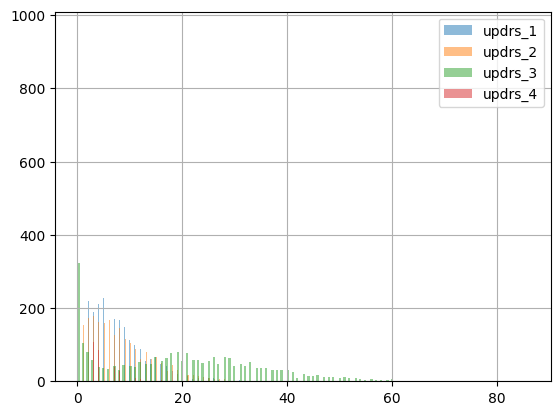

In [13]:
alpha, bins=.5,200
train_clinical['updrs_1'].hist(bins=bins, alpha=alpha, label = 'updrs_1')
train_clinical['updrs_2'].hist(bins=bins, alpha=alpha, label = 'updrs_2')
train_clinical['updrs_3'].hist(bins=bins, alpha=alpha, label = 'updrs_3')
train_clinical['updrs_4'].hist(bins=bins, alpha=alpha, label = 'updrs_4')
plt.legend();

In [14]:
train_clinical.isnull().sum()

visit_id                                  0
patient_id                                0
visit_month                               0
updrs_1                                   1
updrs_2                                   2
updrs_3                                  25
updrs_4                                1038
upd23b_clinical_state_on_medication    1327
dtype: int64

In [15]:
train_clinical.groupby('upd23b_clinical_state_on_medication').count()

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4
upd23b_clinical_state_on_medication,,,,,,,
Off,513,513,513,513,513,513,506
On,775,775,775,775,775,767,760


## Peptides Data

 - UniProt: The UniProt ID code for the associated protein. There are often several peptides per protein.
 https://www.uniprot.org/id-mapping
 - Peptide: The sequence of amino acids included in the peptide. Some codes are here https://en.wikipedia.org/wiki/Amino_acid#Physicochemical_properties_of_amino_acids
 - PeptideAbundance: The frequency of the amino acid in the sample.

In [16]:
train_peptides = pd.read_csv(file_location+'/train_peptides.csv')

In [17]:
train_peptides.tail()

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
981829,58648_108,108,58648,Q9UHG2,ILAGSADSEGVAAPR,202820.00
981830,58648_108,108,58648,Q9UKV8,SGNIPAGTTVDTK,105830.00
981831,58648_108,108,58648,Q9Y646,LALLVDTVGPR,21257.60
981832,58648_108,108,58648,Q9Y6R7,AGC(UniMod_4)VAESTAVC(UniMod_4)R,5127.26
981833,58648_108,108,58648,Q9Y6R7,GATTSPGVYELSSR,12825.90


In [18]:
print('UniProt number: ', train_peptides['UniProt'].nunique())
print('Peptide number: ', train_peptides['Peptide'].nunique())

UniProt number:  227
Peptide number:  968


<Axes: >

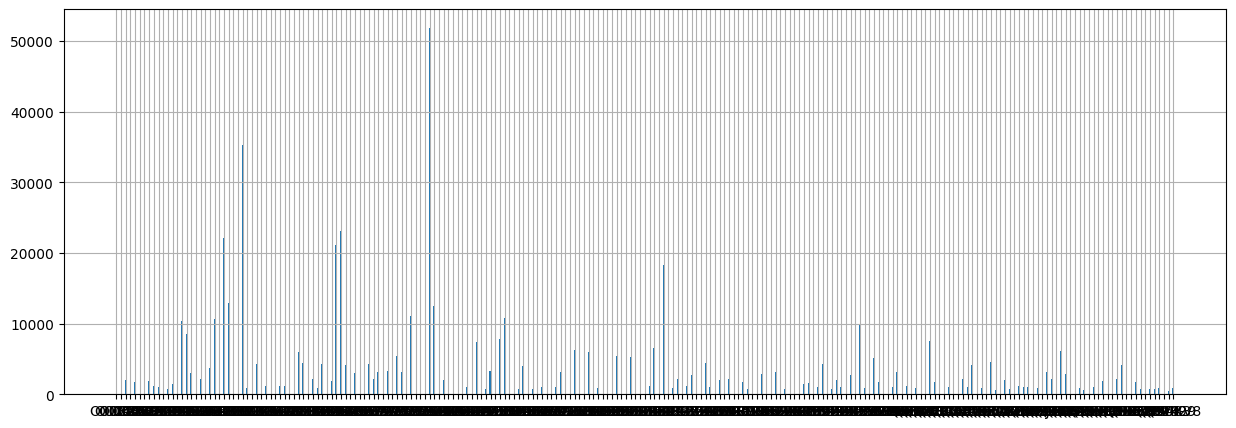

In [19]:
#Proteine Fangen mit O,P,Q an.
plt.figure(figsize=(15, 5))
train_peptides['UniProt'].hist(bins=1000)

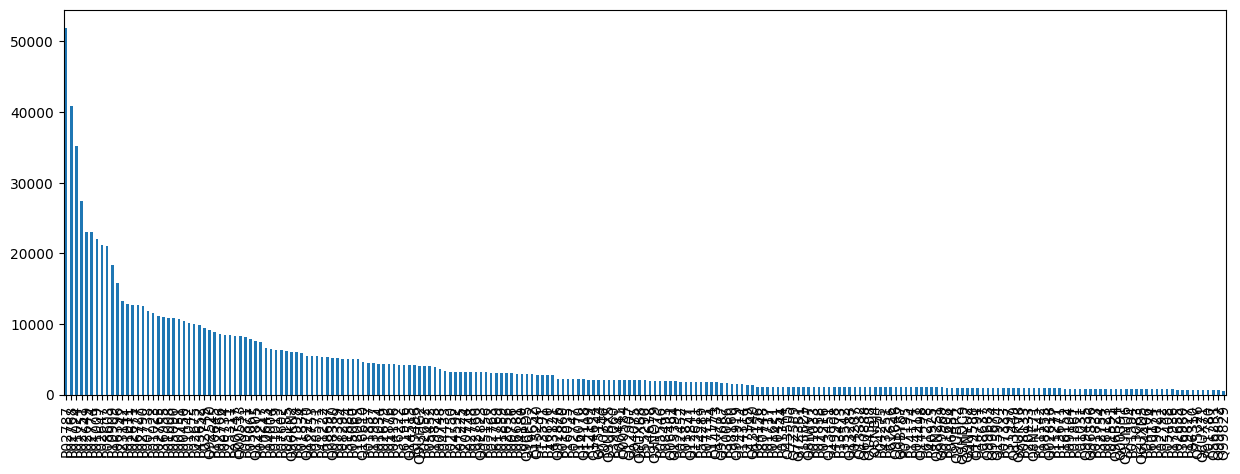

In [20]:
plt.figure(figsize=(15, 5))
train_peptides['UniProt'].value_counts().plot.bar()
plt.show()

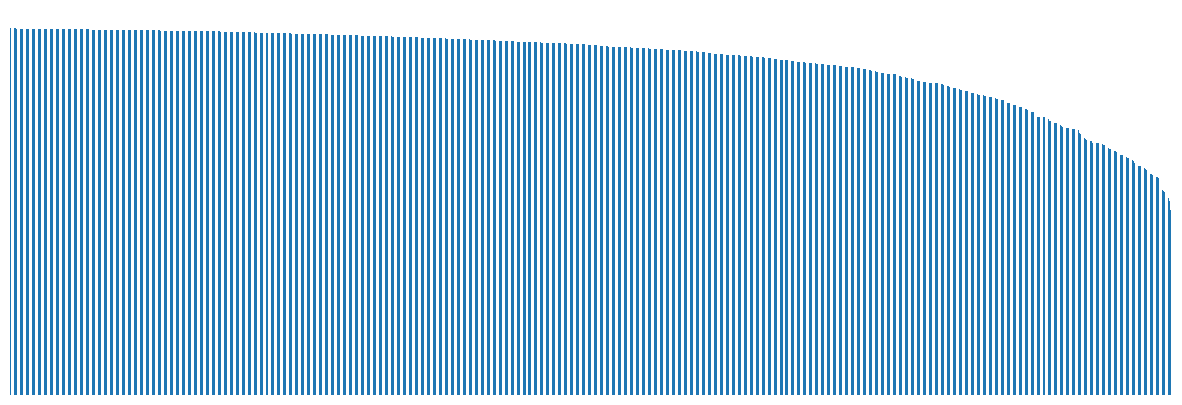

In [21]:
plt.figure(figsize=(15, 5))
train_peptides['Peptide'].value_counts().plot.bar()
plt.axis('off');

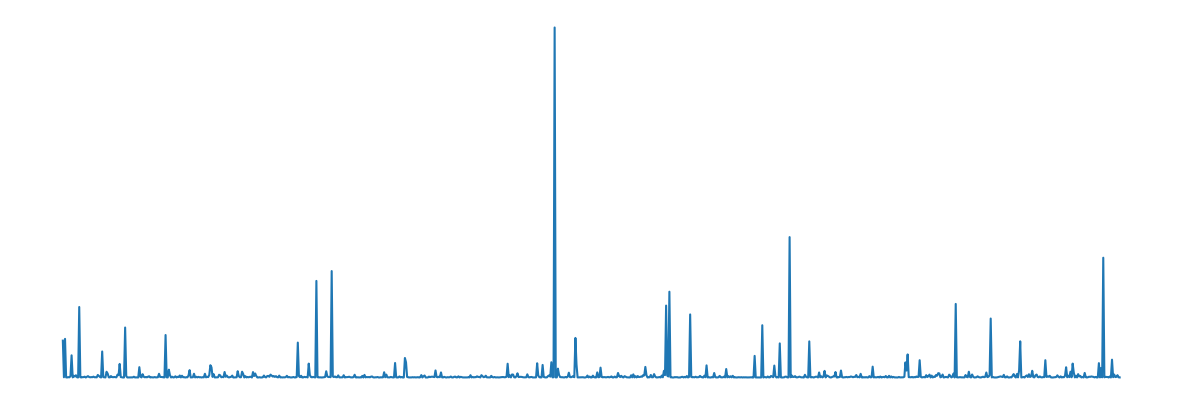

In [22]:
plt.figure(figsize=(15, 5))
a = train_peptides.groupby('Peptide').sum(numeric_only=True)['PeptideAbundance']
plt.plot(a)
plt.axis('off');

## Protein Data

 - UniProt: The UniProt ID code for the associated protein. There are often several peptides per protein.
 https://www.uniprot.org/id-mapping
 - NPX - Normalized protein expression. The frequency of the protein's occurrence in the sample. May not have a 1:1 relationship with the component peptides as some proteins contain repeated copies of a given peptide.

In [23]:
train_protein = pd.read_csv(file_location+'/train_proteins.csv')

In [24]:
train_protein.head()

,visit_id,visit_month,patient_id,UniProt,NPX
0,55_0,0,55,O00391,11254.3
1,55_0,0,55,O00533,732430.0
2,55_0,0,55,O00584,39585.8
3,55_0,0,55,O14498,41526.9
4,55_0,0,55,O14773,31238.0


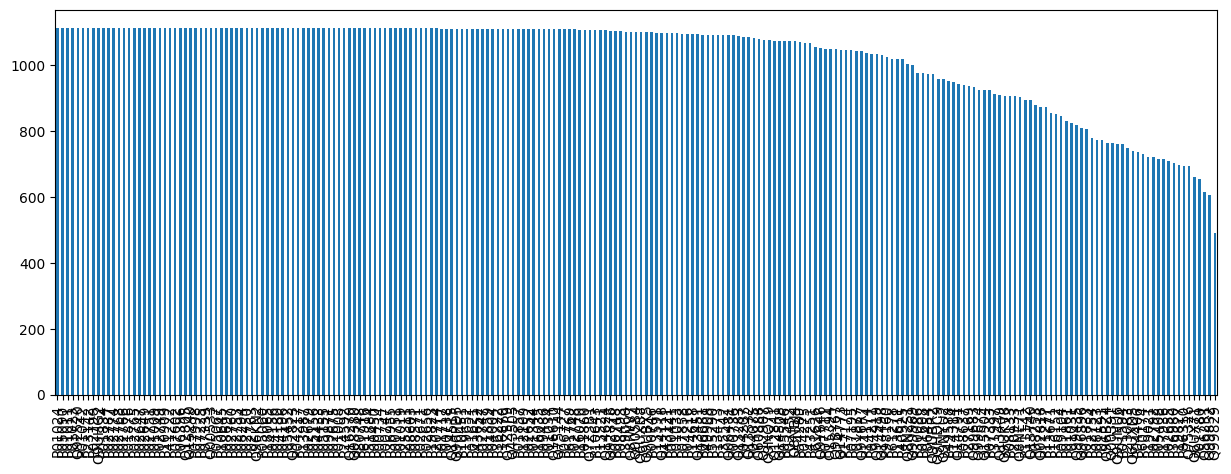

In [25]:
plt.figure(figsize=(15, 5))
train_protein['UniProt'].value_counts().plot.bar()
plt.show()

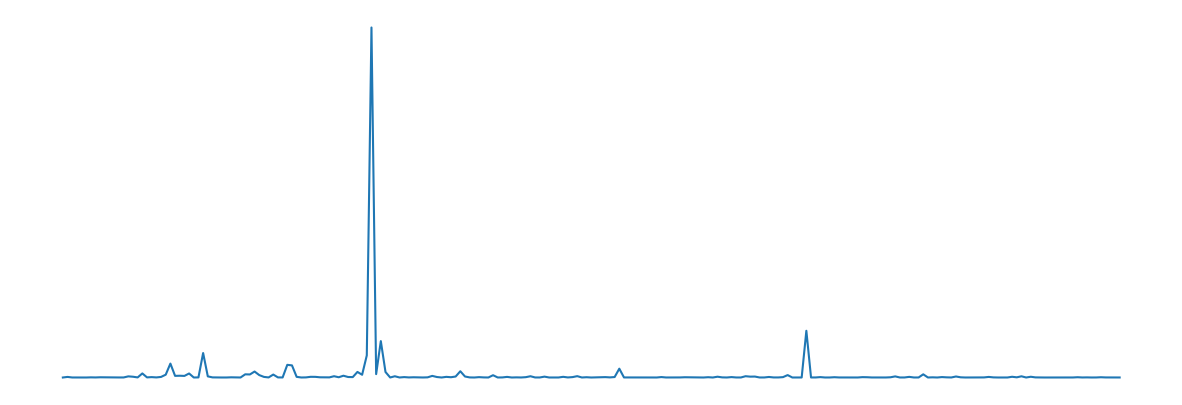

In [26]:
plt.figure(figsize=(15, 5))
a = train_protein.groupby('UniProt').sum(numeric_only=True)['NPX']
plt.plot(a)
plt.axis('off');

# Per User Stuff

## Clinical

In [27]:
train_clinical['upd23b_clinical_state_on_medication'].sample(n=5)

1468    NaN
1201    NaN
1737    Off
1437     On
1964    Off
Name: upd23b_clinical_state_on_medication, dtype: object

In [28]:
def get_clinical_for_patient(_id):
    t = train_clinical[train_clinical['patient_id']==_id][train_clinical['upd23b_clinical_state_on_medication']=='On']
    plt.plot(t['visit_month'], t['updrs_1'], label='updrs_1')
    plt.plot(t['visit_month'], t['updrs_2'], label='updrs_2')
    plt.plot(t['visit_month'], t['updrs_3'], label='updrs_3')
    plt.plot(t['visit_month'], t['updrs_4'], label='updrs_4')
    plt.legend()

C:\Users\Thiele\AppData\Local\Temp\ipykernel_21284\2602492506.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  t = train_clinical[train_clinical['patient_id']==_id][train_clinical['upd23b_clinical_state_on_medication']=='On']


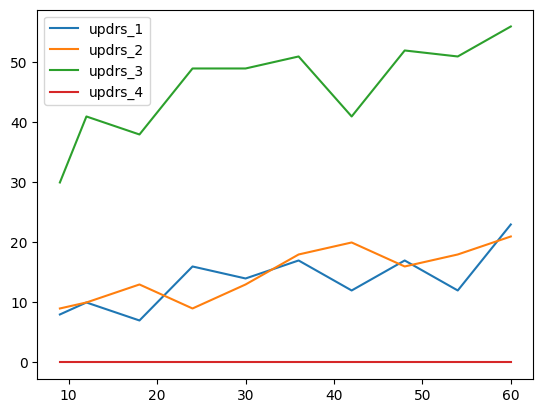

In [29]:
get_clinical_for_patient(55)

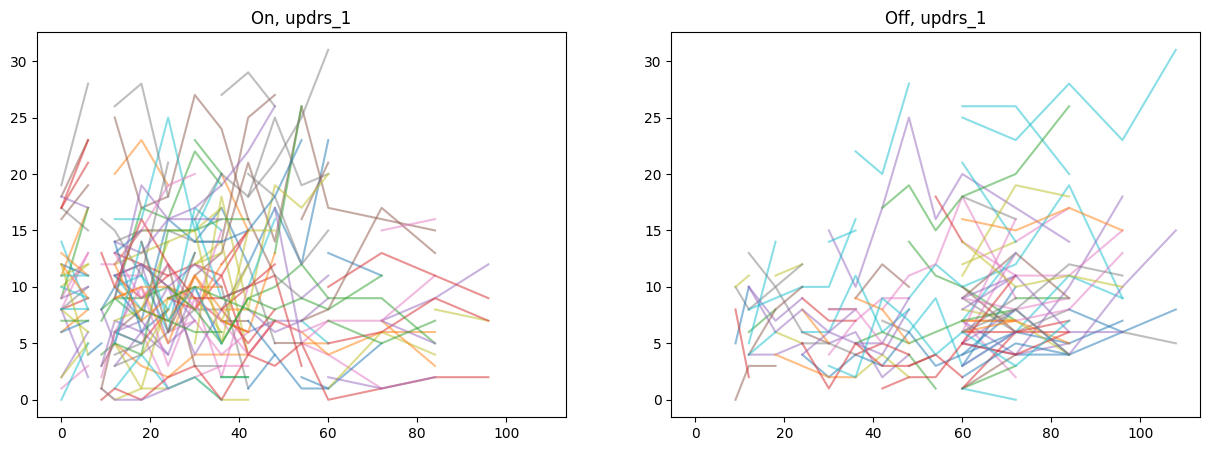

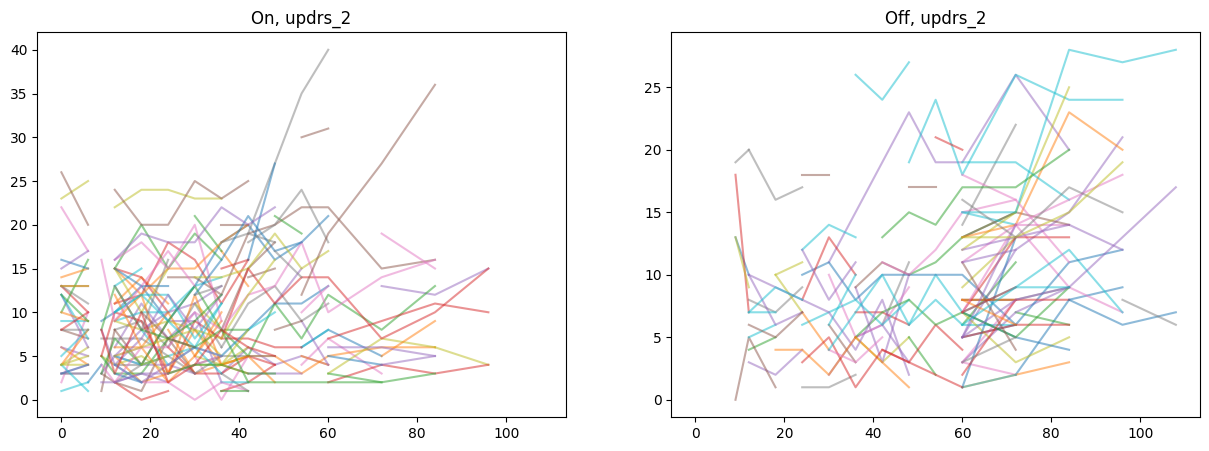

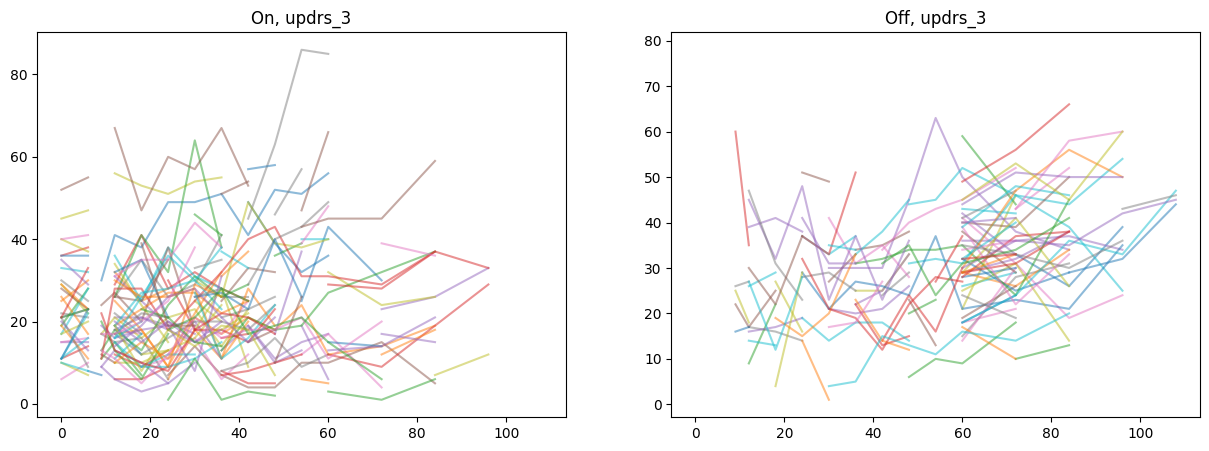

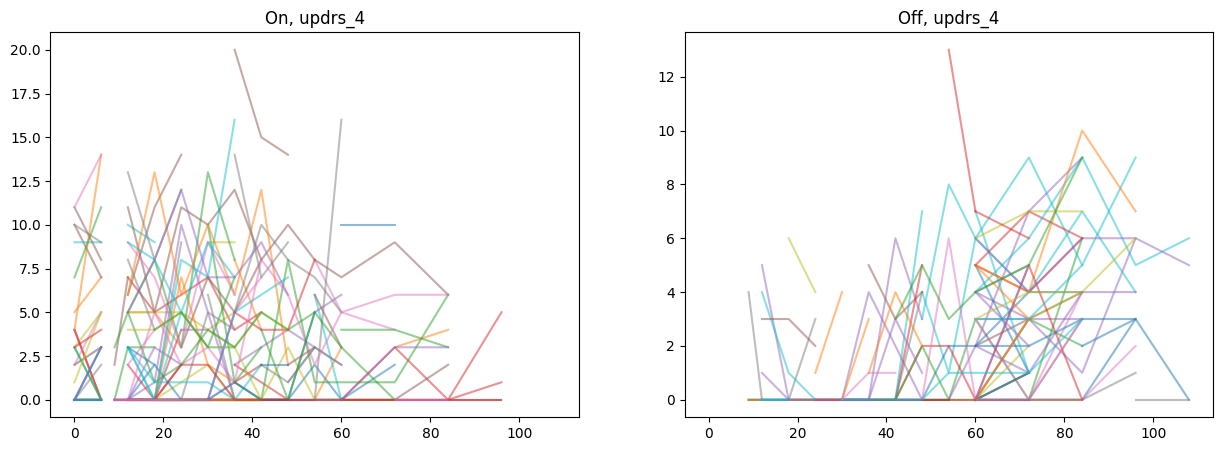

In [31]:
for val in ['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']:
    on = train_clinical[train_clinical['upd23b_clinical_state_on_medication']=='On'].pivot(index='visit_month', columns='patient_id', values=val)
    of = train_clinical[train_clinical['upd23b_clinical_state_on_medication']=='Off'].pivot(index='visit_month', columns='patient_id', values=val)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    axes[0].plot(on, alpha=.5)
    axes[1].plot(of, alpha=.5)
    axes[0].set_title("On, "+val)
    axes[1].set_title("Off, "+val)

## Peptides

In [32]:
train_peptides.head()

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.3
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.0
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.0
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.9
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.7


In [33]:
def get_clinical_for_patient(_id):
    t = train_peptides[train_peptides['patient_id']==_id]
    t = t.groupby(by=['visit_month', 'Peptide'], as_index=False).sum(['PeptideAbundance'])
    t = t.pivot(index='visit_month', columns='Peptide', values='PeptideAbundance')
    return t
    

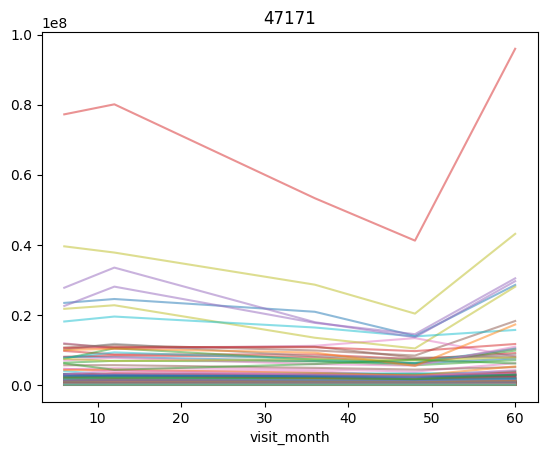

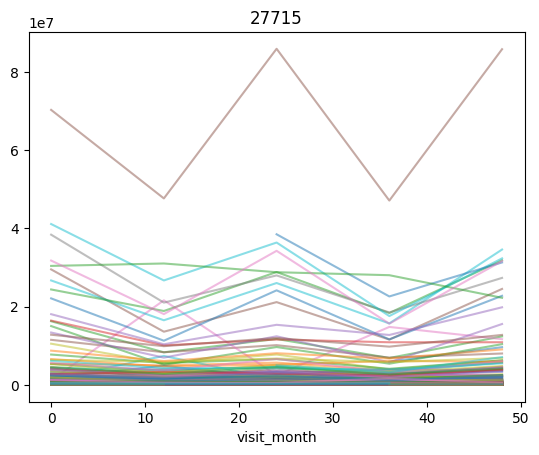

In [45]:
for _id in train_peptides['patient_id'].sample(2):
    get_clinical_for_patient(_id).plot(legend=False, alpha=.5)
    plt.title(_id)

## Indexing

In [100]:
train_clinical

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On
...,...,...,...,...,...,...,...,...
2610,65043_48,65043,48,7.0,6.0,13.0,0.0,Off
2611,65043_54,65043,54,4.0,8.0,11.0,1.0,Off
2612,65043_60,65043,60,6.0,6.0,16.0,1.0,Off
2613,65043_72,65043,72,3.0,9.0,14.0,1.0,Off


In [43]:
pd.pivot_table(train_clinical,index = 'patient_id',columns =['visit_month']).head()

C:\Users\Thiele\AppData\Local\Temp\ipykernel_21284\90695005.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pd.pivot_table(train_clinical,index = 'patient_id',columns =['visit_month']).head()


updrs_1                                                       ...  \
visit_month     0     3     6    9     12    18    24    30    36    42   ...   
patient_id                                                                ...   
55             10.0  10.0   8.0  8.0  10.0   7.0  16.0  14.0  17.0  12.0  ...   
942             3.0   7.0   8.0  NaN   5.0   6.0   2.0   4.0   2.0   2.0  ...   
1517           11.0   NaN  17.0  NaN  20.0  23.0  19.0  20.0  20.0  15.0  ...   
1923            2.0   NaN   2.0  NaN   1.0   2.0   2.0   3.0   3.0   NaN  ...   
2660            2.0   NaN   NaN  NaN   0.0   NaN   2.0   NaN   8.0   NaN  ...   

            updrs_4                                               
visit_month     30   36   42   48   54    60   72   84   96  108  
patient_id                                                        
55              0.0  0.0  0.0  0.0  0.0   0.0  NaN  NaN  NaN NaN  
942             0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  3.0 NaN  
1517           10.0  8.0  4.0  6.0  NaN  10.0  NaN  NaN  NaN NaN  
1923            NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN  NaN NaN  
2660            NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN  NaN NaN  

[5 rows x 68 columns]

In [98]:
df_all = train_protein.merge(train_peptides[['visit_id', 'UniProt', 'Peptide','PeptideAbundance']], on = ['visit_id','UniProt'], how = 'left')

df_by_uniprot = df_all.groupby(['visit_id','UniProt'])['NPX'].mean().reset_index()
df_by_peptide = df_all.groupby(['visit_id','Peptide'])['PeptideAbundance'].mean().reset_index()

df_uniprot = df_by_uniprot.pivot(index='visit_id',columns = 'UniProt', values = 'NPX').rename_axis(columns=None).reset_index()
df_peptide = df_by_peptide.pivot(index='visit_id',columns = 'Peptide', values = 'PeptideAbundance').rename_axis(columns=None).reset_index()

df_uniprot[['patient_id','visit_month']] = df_uniprot.visit_id.str.split("_", expand=True)
df_peptide[['patient_id','visit_month']] = df_peptide.visit_id.str.split("_", expand=True)


In [99]:
df_peptide.head()

,visit_id,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,AANEVSSADVK,AATGEC(UniMod_4)TATVGKR,AATVGSLAGQPLQER,AAVYHHFISDGVR,ADDKETC(UniMod_4)FAEEGK,ADDKETC(UniMod_4)FAEEGKK,...,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK,patient_id,visit_month
0,10053_0,6580710.0,31204.4,7735070.0,NaN,NaN,NaN,46620.3,236144.0,NaN,...,4401830.0,77482.6,583075.0,76705.7,104260.0,530223.0,NaN,7207.30,10053,0
1,10053_12,6333510.0,52277.6,5394390.0,NaN,NaN,NaN,57554.5,108298.0,45885.4,...,5001750.0,36745.3,355643.0,92078.1,123254.0,453883.0,49281.9,25332.80,10053,12
2,10053_18,7129640.0,61522.0,7011920.0,35984.7,17188.0,19787.3,36029.4,708729.0,5067790.0,...,5424380.0,39016.0,496021.0,63203.6,128336.0,447505.0,52389.1,21235.70,10053,18
3,10138_12,7404780.0,46107.2,10610900.0,NaN,20910.2,66662.3,55253.9,79575.5,6201210.0,...,3900280.0,48210.3,328482.0,89822.1,129964.0,552232.0,65657.8,9876.98,10138,12
4,10138_24,13788300.0,56910.3,6906160.0,13785.5,11004.2,63672.7,36819.8,34160.9,2117430.0,...,3521800.0,69984.6,496737.0,80919.3,111799.0,NaN,56977.6,4903.09,10138,24


In [68]:

df_uniprot['patient_id'] = pd.to_numeric(df_uniprot['patient_id'])
df_uniprot['visit_month'] = pd.to_numeric(df_uniprot['visit_month'])
df_peptide['patient_id'] = pd.to_numeric(df_peptide['patient_id'])
df_peptide['visit_month'] = pd.to_numeric(df_peptide['visit_month'])

df_uniprot = pd.pivot_table(df_uniprot,index = 'patient_id',columns =['visit_month'], margins_name=False)
df_uniprot = df_uniprot.reindex(sorted(df_uniprot.columns,), axis=1)
df_peptide = pd.pivot_table(df_peptide,index = 'patient_id',columns =['visit_month'])
df_peptide = df_peptide.reindex(sorted(df_peptide.columns,), axis=1)


C:\Users\Thiele\AppData\Local\Temp\ipykernel_21284\4175100841.py:17: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df_uniprot = pd.pivot_table(df_uniprot,index = 'patient_id',columns =['visit_month'], margins_name=False)
C:\Users\Thiele\AppData\Local\Temp\ipykernel_21284\4175100841.py:19: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df_peptide = pd.pivot_table(df_peptide,index = 'patient_id',columns =['visit_month'])


In [59]:
import numpy as np

In [69]:
df_uniprot.head()

O00391                                                   \
visit_month      0   3        6         12  18       24  30       36    
patient_id                                                              
55           11254.3 NaN  13163.6  15257.60 NaN      NaN NaN  13530.8   
942              NaN NaN  11218.7   6757.32 NaN      NaN NaN      NaN   
1517         11648.9 NaN      NaN       NaN NaN  11671.9 NaN  10150.4   
1923         21361.8 NaN      NaN       NaN NaN      NaN NaN      NaN   
2660             NaN NaN      NaN  15516.20 NaN      NaN NaN      NaN   

                          ...   Q9Y6R7                                         \
visit_month      48  54   ...      24  30       36       48  54       60  72    
patient_id                ...                                                   
55               NaN NaN  ...      NaN NaN  21717.1      NaN NaN      NaN NaN   
942          11627.8 NaN  ...  14625.6 NaN      NaN  16418.5 NaN      NaN NaN   
1517             NaN NaN  ...  24159.4 NaN  20723.8      NaN NaN  24784.6 NaN   
1923             NaN NaN  ...  20110.6 NaN  31095.8      NaN NaN      NaN NaN   
2660             NaN NaN  ...  15679.4 NaN      NaN  24798.6 NaN      NaN NaN   

                         
visit_month 84  96  108  
patient_id               
55          NaN NaN NaN  
942         NaN NaN NaN  
1517        NaN NaN NaN  
1923        NaN NaN NaN  
2660        NaN NaN NaN  

[5 rows x 3385 columns]

In [51]:
df_peptide.head()

AADDTWEPFASGK                                                 \
visit_month           0   3          6           12  18          24  30    
patient_id                                                                 
55              8984260.0 NaN  8279770.0   8382390.0 NaN         NaN NaN   
942                   NaN NaN  6177730.0  11289900.0 NaN  10161900.0 NaN   
1517            9465580.0 NaN        NaN         NaN NaN   6282660.0 NaN   
1923           12952600.0 NaN        NaN         NaN NaN  10230700.0 NaN   
2660            5831550.0 NaN  6495700.0   7732330.0 NaN   5005440.0 NaN   

                                        ... YYWGGQYTWDMAK                \
visit_month         36         48  54   ...           24  30        36    
patient_id                              ...                               
55           10671500.0        NaN NaN  ...           NaN NaN  13973.70   
942                 NaN  8248490.0 NaN  ...      21847.60 NaN       NaN   
1517          7293010.0        NaN NaN  ...      26098.30 NaN  13430.00   
1923         11769500.0        NaN NaN  ...       6290.76 NaN   2661.98   
2660                NaN  7933520.0 NaN  ...      25740.50 NaN       NaN   

                                                   
visit_month      48  54       60  72  84  96  108  
patient_id                                         
55               NaN NaN      NaN NaN NaN NaN NaN  
942          20700.3 NaN      NaN NaN NaN NaN NaN  
1517             NaN NaN  16738.3 NaN NaN NaN NaN  
1923             NaN NaN      NaN NaN NaN NaN NaN  
2660         12826.3 NaN      NaN NaN NaN NaN NaN  

[5 rows x 14429 columns]

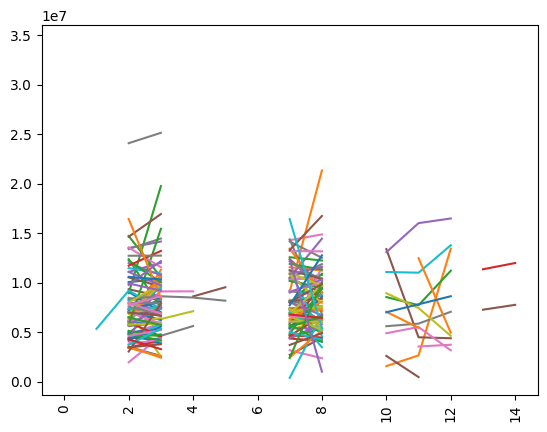

In [96]:
#plt.plot(np.array(df_peptide.loc[[_id]]['AADDTWEPFASGK']))
plt.plot(np.array(df_peptide['AADDTWEPFASGK']).transpose())
plt.xticks(rotation=90);

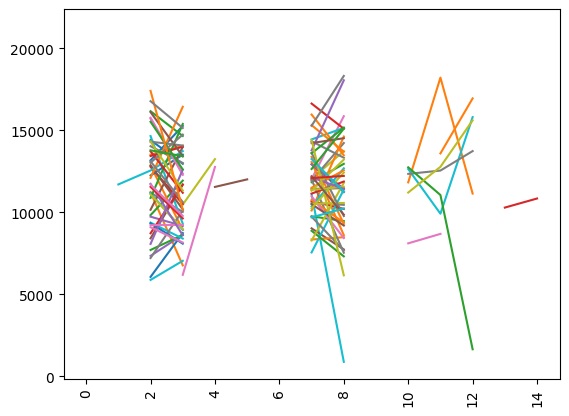

In [97]:
plt.plot(np.array(df_uniprot['O00391']).transpose())
plt.xticks(rotation=90);

In [103]:
d = df_uniprot.merge(df_peptide, on=['visit_id'])

In [105]:
d

,visit_id,O00391,O00533,O00584,O14498,O14773,O14791,O15240,O15394,O43505,...,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK,patient_id_y,visit_month_y
0,10053_0,9104.27,402321.0,NaN,NaN,7150.57,2497.84,83002.9,15113.6,167327.0,...,4401830.0,77482.6,583075.0,76705.7,104260.0,530223.0,NaN,7207.30,10053,0
1,10053_12,10464.20,435586.0,NaN,NaN,NaN,NaN,197117.0,15099.1,164268.0,...,5001750.0,36745.3,355643.0,92078.1,123254.0,453883.0,49281.9,25332.80,10053,12
2,10053_18,13235.70,507386.0,7126.96,24525.7,NaN,2372.71,126506.0,16289.6,168107.0,...,5424380.0,39016.0,496021.0,63203.6,128336.0,447505.0,52389.1,21235.70,10053,18
3,10138_12,12600.20,494581.0,9165.06,27193.5,22506.10,6015.90,156313.0,54546.4,204013.0,...,3900280.0,48210.3,328482.0,89822.1,129964.0,552232.0,65657.8,9876.98,10138,12
4,10138_24,12003.20,522138.0,4498.51,17189.8,29112.40,2665.15,151169.0,52338.1,240892.0,...,3521800.0,69984.6,496737.0,80919.3,111799.0,NaN,56977.6,4903.09,10138,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,8699_24,9983.00,400290.0,24240.10,NaN,16943.50,6303.17,77493.6,46435.3,254247.0,...,8770410.0,33599.1,926094.0,118897.0,133682.0,571879.0,80268.3,54889.70,8699,24
1109,942_12,6757.32,360858.0,18367.60,14760.7,18603.40,1722.77,86847.4,37741.3,212132.0,...,374307.0,35767.3,250397.0,65966.9,77976.8,486239.0,45032.7,NaN,942,12
1110,942_24,NaN,352722.0,22834.90,23393.1,16693.50,1487.91,114772.0,36095.7,185836.0,...,NaN,64049.8,479473.0,68505.7,74483.1,561398.0,52916.4,21847.60,942,24
1111,942_48,11627.80,251820.0,22046.50,26360.5,22440.20,2117.43,82241.9,30146.6,167633.0,...,NaN,28008.8,231359.0,63265.8,64601.8,632782.0,51123.7,20700.30,942,48


In [104]:

d = pd.pivot_table(d, index='patient_id', columns=['visit_month'])
d = df_peptide.reindex(sorted(d.columns, ), axis=1)

KeyError: 'patient_id'